<center><h1>Numerical Linear Algebra: SVD applications</h1>
<h2><i>Project 2</i></h2>

**Manuel Andrés Hernández Alonso**, `mhernaal70.alumnes@ub.edu`, **niub**20274855
</center>

The goal of this project is to discuss three common applications of the SVD decomposition: LS problem, graphics compression and PCA.

## 1. Least Squares Problem

Of all the vectors $x$ that minimize $||Ax-b||$, which is the shortest (that is, the one with $||x||_2$ minimum)? That is, we look for the minimum norm solution of the least squares problem. We can solve this problem then with:

$$
x = A^{\dag}b
$$

---

**Exercise:** Write a program to solve the LS problem using SVD. Compute the LS solution for the datasets ```datafile``` and ```datafile2.csv``` that were used in ```pr4: QR factorization and least square problems```. Compare the results using SVD with those obtained from the QR solution of the LS problems.

I wrote two routines to compute the solution of the least squares problems using SVD (```solve_LSP_SVD(A, b)```) and QR factorization (```solve_LSP_QR(A, b)```), both found in ```LSP.py```.

For the first dataset ```datafile```, I had to create the A by computing the polinomials of the x column (up to the 6th exponent), and took the y column as the b for the least squares. For both routines I was able to get the approximately the same solution (up to the 14th decimal) for both routines and it also matches the result for ```scipy```'s least squares problem solver.

For the second dataset ```datafile2.csv```, I found the same solution with both routines (up to the 9th decimal), with a norm of $1.149597895$. Which coincides with ```scipy```'s solution. I had to modify the SVD algorithm because of the numerical stability, some of the eigenvalues obtained were too small, so the result exploded in proportions. This phenomenon created worse results for the Least Squares problem.

## 2. Graphics Compression

1. Using the Eckart-Young-Mirsky theorem it is posible to demonstrate that the given SVD decomposition such as:

$$
A = U \Sigma V^T
$$

is the best low rank approximation for any given $A$ for both the 2-norm and the Forbenius norm.

---

2. I created a routine ```image_compression(img_path, start=1, stop=41, step=5)``` in the file ```graphics_compression.py``` that creates 8 different approximations with SVD of the original image, then saves them as the name of ```image_{datetime}_{frobenius norm percentage}```. Here I computed the approximations of the given image and see how it gets less lossy compression:

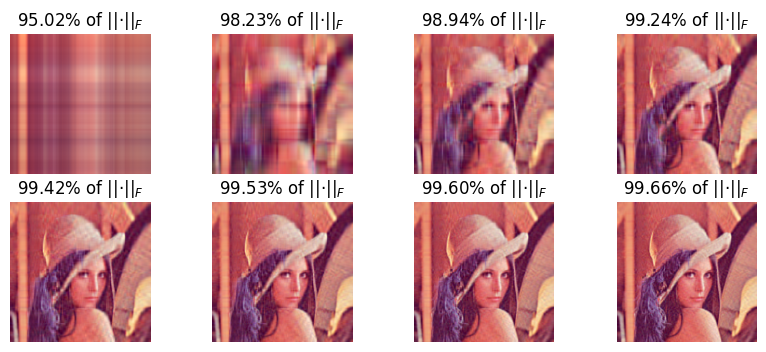

Here I used another image with different color, contrasts and lighting:

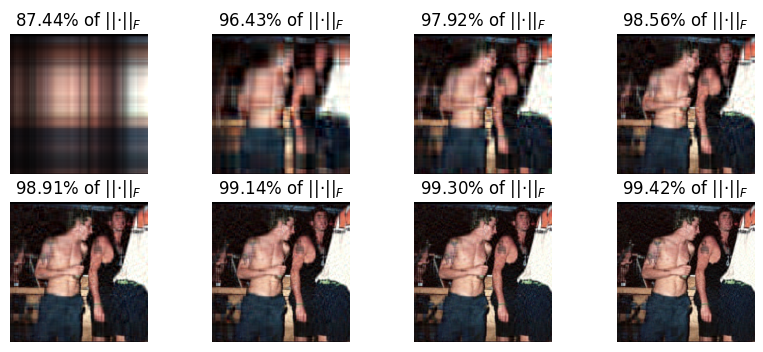


Here I used another image with shape:

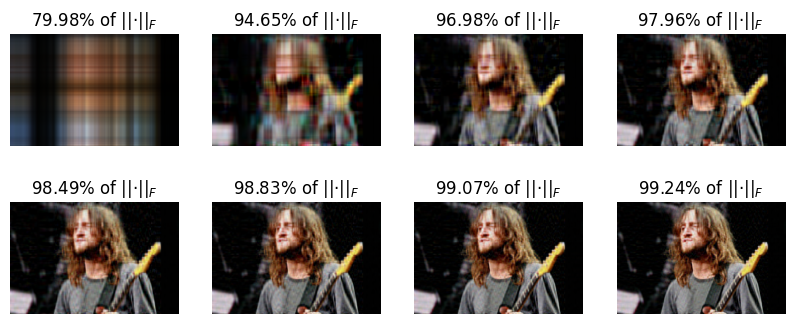

As we can see the norms get better the more ranks we use. It is also noticeable that the image gets less lossy and more clear on each iteration, here I used the ranges of values 1 to 40 in steps of 5.

---

## 3. Principal component analysis (PCA)

**Main idea:** Principal component analysis is a technique to detect the main components of a data set in order to reduce into fewer dimensions retaining the relevant information. Let $X \in \mathbf{R}^{m\times n}$ a data set with zero mean, that is, the matrix formed by $n$ observations of $m$ variables (or observables). Below we denote the $m$ variables as $x_1, . . . , x_m$. The elements of $X$ are denoted as usual by $x_{ij}$ meaning that it contains the value of the observable $i$ of the $j$-th observation experiment.

---

1. Firstly, I applied the PCA to ```example.dat``` with the covariance matrix and then with correlation matrix. The code then gives the accumulated sum of the variance for the components, as well as the standard deviation of each principal component, then it saves the dataset in the new PCA coordinates in a file with name ```pca_data_1.csv```. When testing, the first two components already explained 97.68% of the variance with the covariance matrix, for the correlation method you needed 3 to get 96.32% of the variance explained. Here the idea is to explain as much variance with as little components as posible, thus, covariance matrix works better in this case.

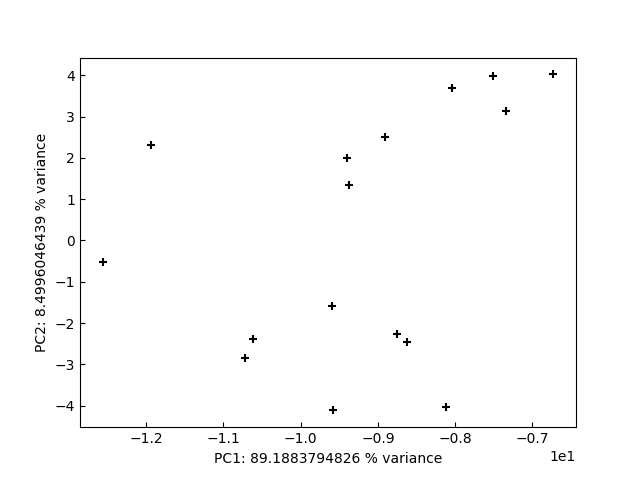

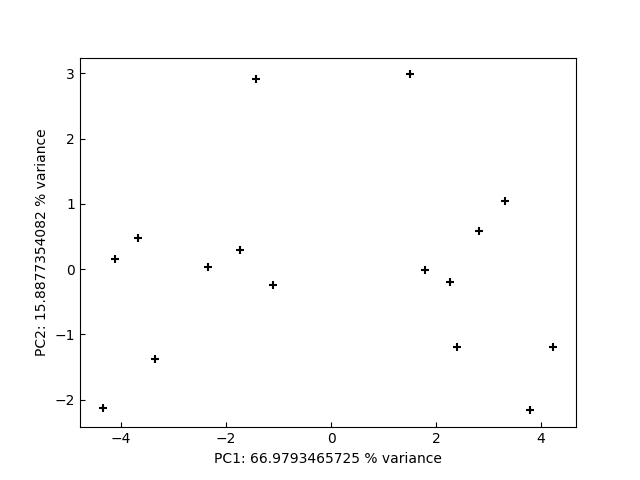

2. For the ```RCsGoff.csv``` dataset I firstly loaded it and computed the PCA data on the covariance matrix by centering the mean. While testing I got similar results as the ones shown in the delivery, and got that you needed at least 4 components to explain more than 95% of the variance, thus, we can reduce the dimensionality of the dataset while not losing much variance of the data.

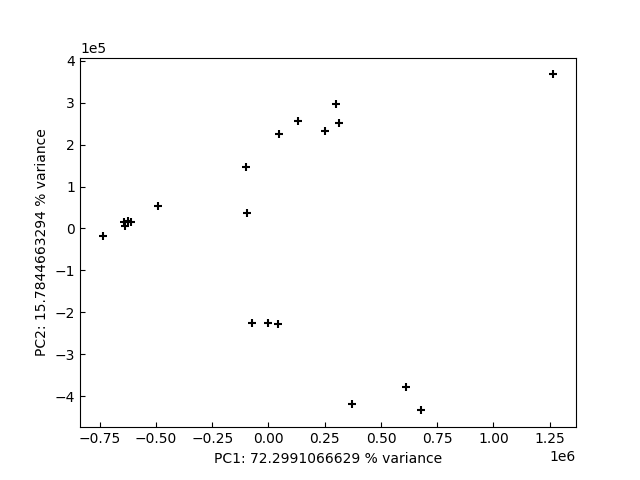

These routines can be found in ```PCA.py```, and the computation of the PCA is the function ```compute_PCA(X)``.